In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string
import math

In [2]:
datapath = "/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/run2/tables/"
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv",
         "nonlinearmodelq0ctime_fit_table.csv"]


# model_hash = {}
# k = -1
# for model in models:
#     k += 1
#     model_hash[model] = string.ascii_uppercase[k]

# df = pd.DataFrame.from_dict(model_hash, orient='index')
# df.to_csv('../postmodel_derivatives/model_hash.csv', header=False)

In [3]:
rois = []
for model in models:
    df = pd.read_csv(datapath + model) #get rois in all tables (some may have failed)
    rois += list(df.roi.unique())

    
rois = list(set(rois))

#get inferred
theta = df.columns[2:] 
ntheta = len(theta)



In [4]:
#get rois

roi_us = np.sort([i for i in rois if i[:2]=='US'])[::-1]
roi_other = np.sort([i for i in rois if i[:2]!='US'])[::-1]
rois = list(roi_us) + list(roi_other)



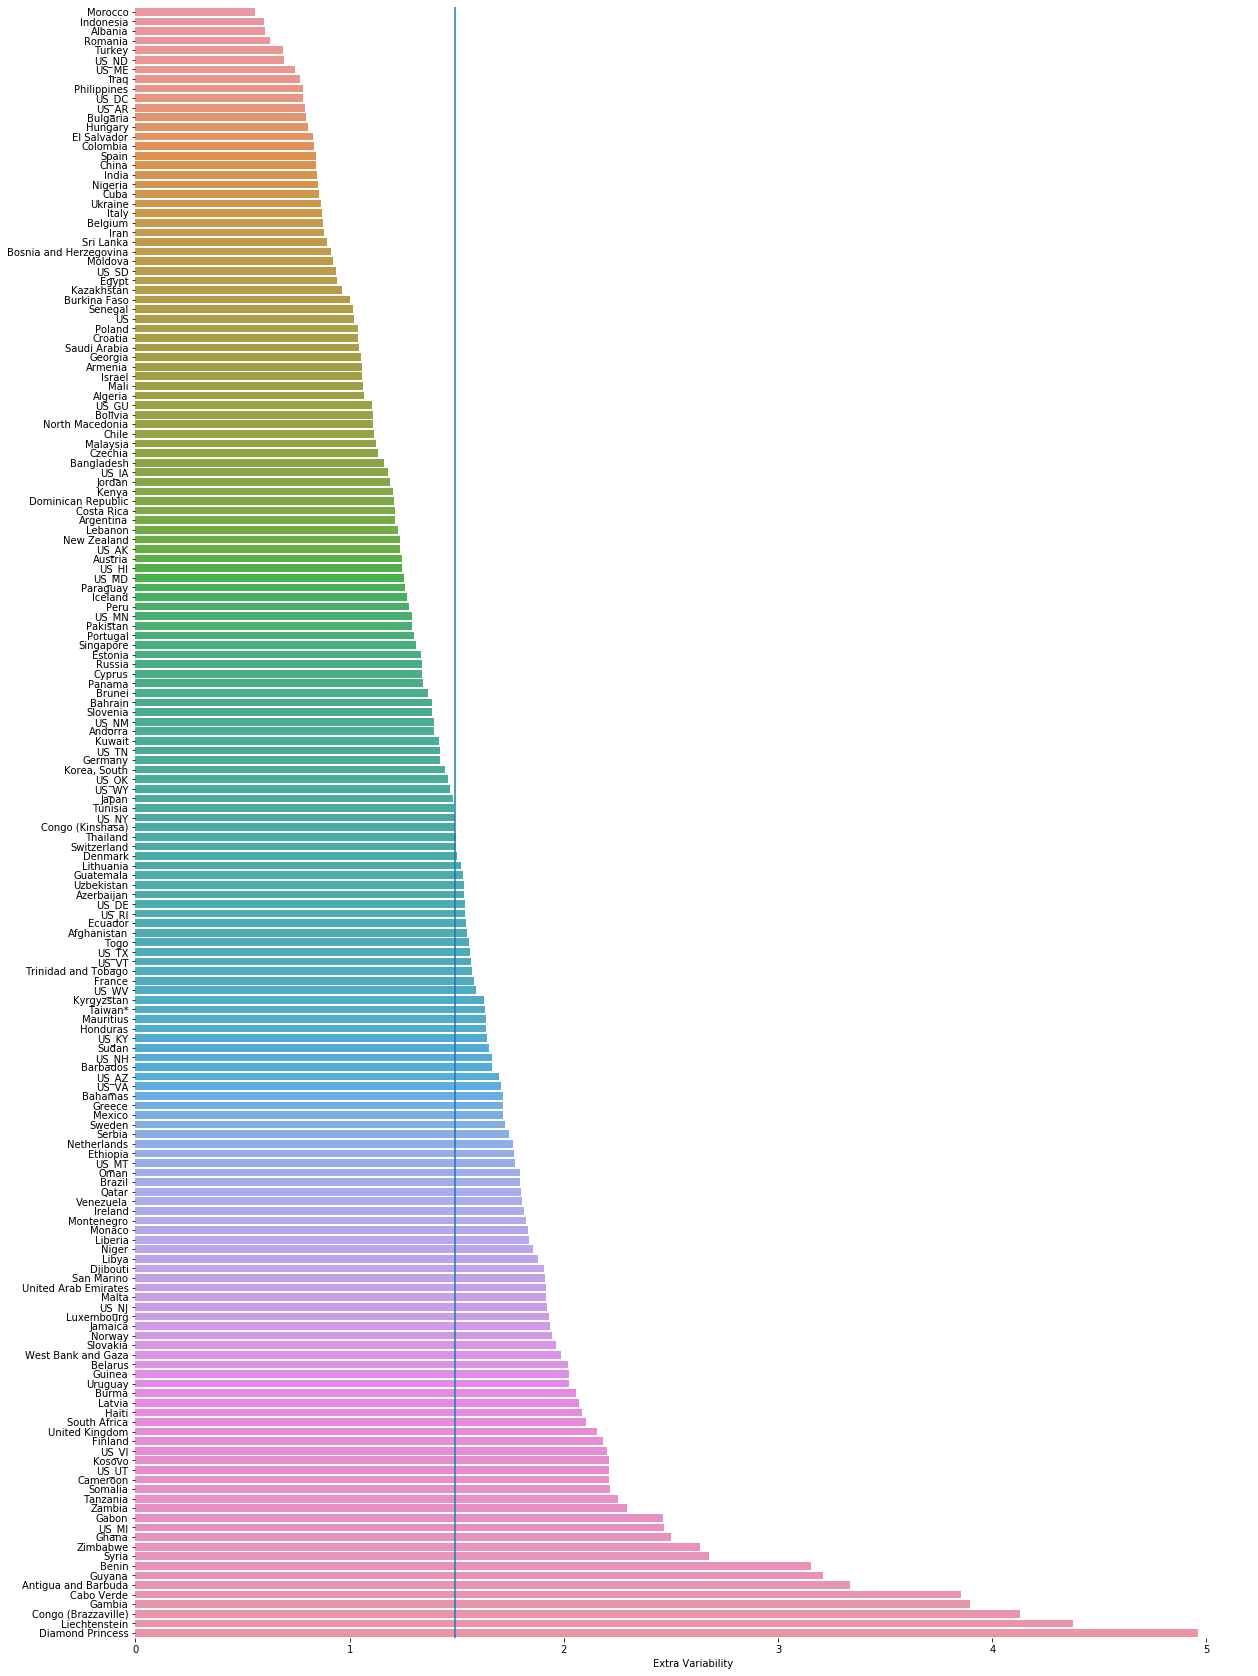

In [29]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    return
             
fs=24

theta_ = ["extra_std"]
label_ = ['Extra Variability']
xticks_ = [[0,5]]
# xlim_ = [[0,5,10],[0,1,2],[0,0.5,1],[0,2,5]]

def histrois(theta):
    x = []
    dfrank = pd.DataFrame(columns = ['roi','sd'])
    dfbest = pd.read_csv("../postfit_derivatives/"+theta+"_summary.csv")
    k = -1
    for roi in rois:
        model = dfbest.loc[(dfbest.Region==roi), "Model"].values[0] + "_fit_table.csv"
        df = pd.read_csv(datapath + model)
        try:
            x2 = df.loc[(df.roi==roi)&(df['quantile']==0.5), theta].values[0]
            if np.isfinite(x2):
                x.append(x2)
                k += 1
                dfrank.loc[k] = [roi,x2]
        except:
            print(roi)
            print()
#     mu = np.median(x)
#     print(mu)
#     f = sns.distplot(x,hist=True,kde=False,ax=ax,color=histcolor)
#     simpleaxis(ax)
#     ax.set_title(label,fontsize=fs)
#     ax.axvline(mu)
#     ax.text(mu,20,str(np.round(mu,3)))
#     ax.get_yaxis().set_visible(False)
#     ax.set_xticks(xticks)
#     ax.set_xlim((min(xticks),max(xticks)))
    return dfrank
    
f,ax = plt.subplots(1,1,figsize=(20,30))
c_ = sns.color_palette("GnBu_d")

dfrank = histrois(theta_[0])
plt.subplots_adjust(wspace=0.5)

dfrank = dfrank.sort_values('sd')

sns.barplot(x="sd", y="roi", data=dfrank[:],ax=ax)

mu = np.median(dfrank['sd'].values[:])
ax.axvline(mu)
ax.set_ylabel('')
ax.set_xlabel('Extra Variability')

# print(dfrank.loc[dfrank.roi=='Russia',])
simpleaxis(ax)

plt.savefig('../postfit_derivatives/fig_overdispersion.png')